In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [4]:
df= pd.read_csv("sales_data_sample.csv", encoding= "latin1")

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
df.shape

(2823, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [9]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

In [11]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [12]:
df["STATE"] = df["STATE"].fillna("UNKNOWN")

In [13]:
df["POSTALCODE"] = df["POSTALCODE"].fillna(0)

In [15]:
df["YEAR"] = df["ORDERDATE"].dt.year
df["MONTH"] = df["ORDERDATE"].dt.month

In [17]:
df["QUARTER"] = df["ORDERDATE"].dt.quarter

In [19]:
monthly_sales = df.groupby(["YEAR","MONTH"])["SALES"].sum()

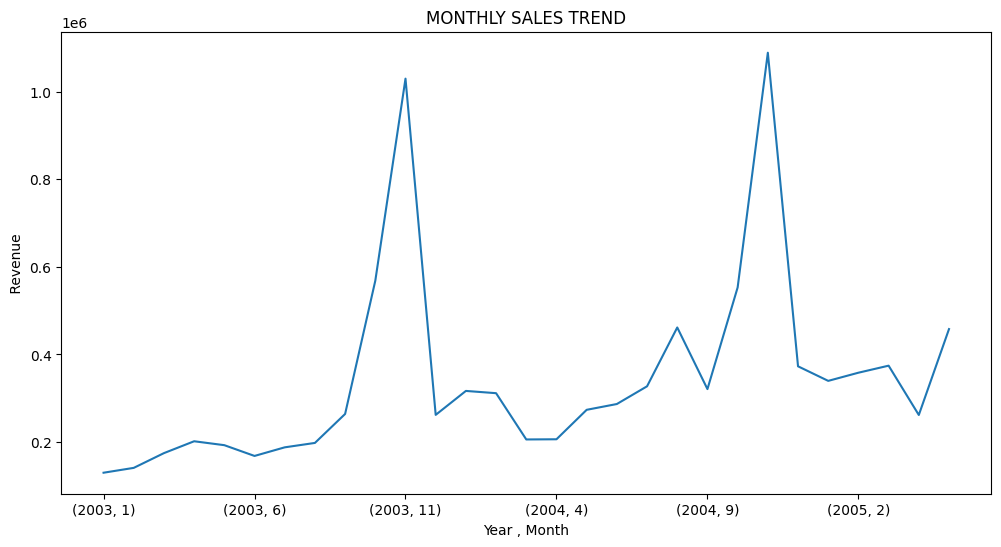

In [25]:
monthly_sales.plot(figsize=(12,6))
plt.title("MONTHLY SALES TREND")
plt.xlabel("Year , Month")
plt.ylabel(" Revenue ")
plt.show()


In [27]:
product_sales = df.groupby(["PRODUCTLINE"])["SALES"].sum().sort_values(ascending=False)

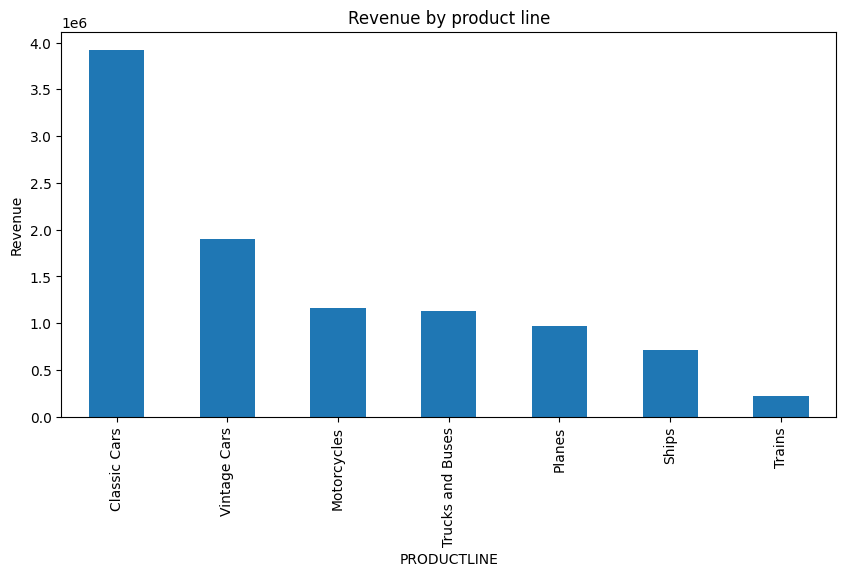

In [29]:
product_sales.plot(kind='bar', figsize=(10,5))
plt.title("Revenue by product line")
plt.ylabel("Revenue")
plt.show()

country_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind = "bar" , figsize = (12,6) )
plt.title("Top 10 countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()

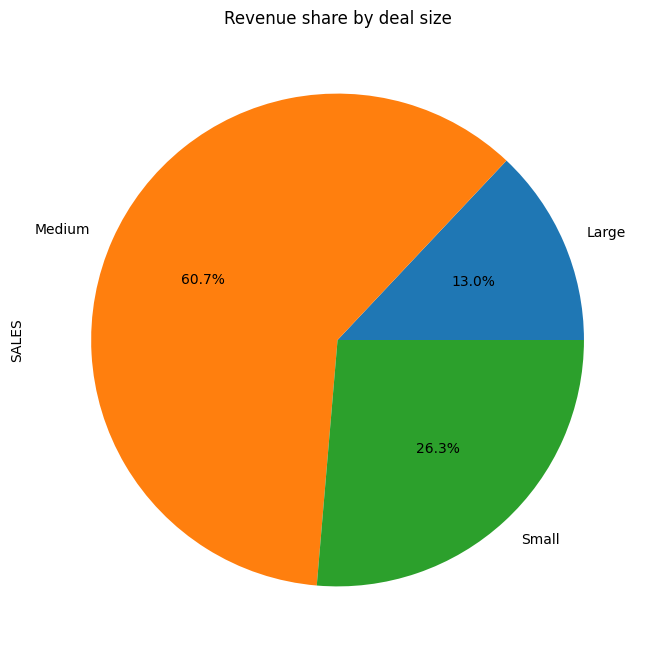

In [33]:
deal_sales = df.groupby("DEALSIZE")["SALES"].sum()
deal_sales.plot(kind="pie" , autopct="%1.1f%%" ,figsize=(8,8))
plt.title("Revenue share by deal size")
plt.show()

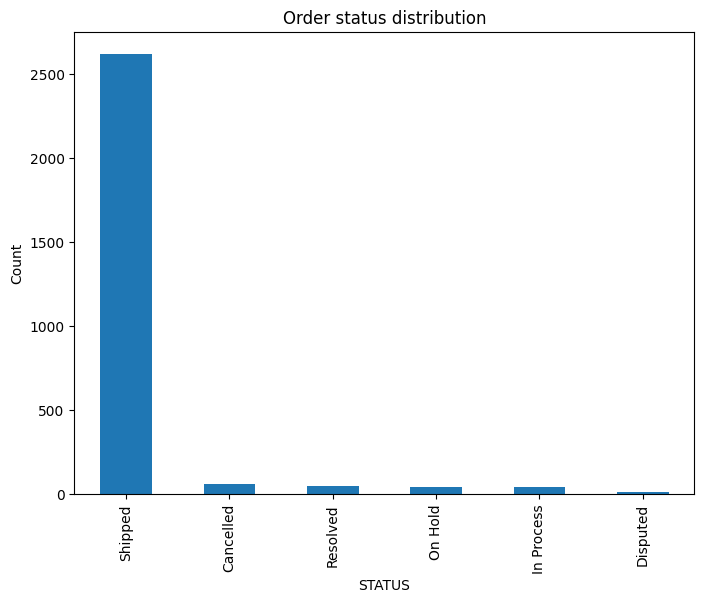

In [37]:
status_count = df["STATUS"].value_counts()
status_count.plot(kind= "bar" , figsize=(8,6))
plt.title("Order status distribution")
plt.ylabel("Count")
plt.show()

Key Insights
1. Classic Cars is the top-performing product line

Classic Cars contributes the highest total revenue, followed by Motorcycles and Trucks.

This shows strong customer preference for collectible or premium model cars.

2. USA, France, and Spain generate the most sales

USA is the largest revenue market, significantly higher than all others.

France is the top performer in Europe.

Spain and UK also show consistently strong performance.

3. Medium Deal Size generates the most revenue

Most orders fall into the Medium category.

Large deal sizes bring good value but occur less frequently.

Small deals contribute the least overall.

4. Over 95% of orders are successfully shipped

“Shipped” is by far the most common status.

Cancelled, Disputed, and On Hold orders are very low in number.

Great indication of efficient operations.

5. Sales consistently peak in Q4 every year

Especially in October, November, and December.

This indicates strong seasonal demand — possibly due to holidays or year-end sales.

6. 2004 was the strongest revenue year

Sales increased each year from 2003 to 2005.

2004 had the most consistent and highest-performing quarters.

📌 Business Recommendations
1. Increase inventory and marketing for Classic Cars

Since they generate maximum revenue:

Stock more units

Launch special editions

Offer bundle deals

2. Focus sales efforts more on USA, France, and Spain

These countries bring the highest returns:

Allocate larger marketing budgets

Improve distribution channels

Localized campaigns can boost sales further

3. Promote Medium and Large deal sizes

Offer incentives for bulk purchases

Provide discount tiers for higher order quantities

4. Improve tracking for orders that become “On Hold” or “Cancelled”

Even small improvements in these areas can:

Boost customer satisfaction

Recover potentially lost revenue

5. Prepare for year-end demand

Since Q4 is the best-performing quarter:

Increase stock levels

Run festival/holiday promotions

Ensure strong supply chain and staffing during this period

6. Expand into growing markets

Countries like Spain and UK show strong year-on-year growth:

Increase local partnerships

Offer country-specific deals